# Minimum Length Nozzle w/ MOC
## Resource:
Aerothermodynamics of High Speed Flows, Lec 5

###### Von Karman Institute of Fluid Dynamics

In [44]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

parameterfile= "PARAMS XLS ADDRESS"
solidworksinputfile= "D:\\solidworksinput.txt"
file= open(solidworksinputfile,"w+")

In [45]:
params= pd.read_excel(parameterfile)
params=params.transpose()
print(params)


                                  0                            1  \
PARAMETER  Chamber Pressure P1 (Pa)  Chamber Temperature T_1 (K)   
VALUE                    2.1192e+06                         3000   

                            2             3                         4    5  
PARAMETER  Throat Radius (cm)  Altitude (m)  Coefficient of Heats (γ)    R  
VALUE                      35         10000                       1.3  378  


In [46]:

p_1= params.iloc[1,0]    #CHAMBER PRESSURE
T_1= params.iloc[1,1]    #CHAMBER TEMP
ALT= params.iloc[1,3]    #Altitude
g=   params.iloc[1,4]    #gamma
R=   params.iloc[1,5]    #gas constant
TR=  params.iloc[1,2]    #Throat radius

Cf= np.sqrt(((2*(g**2)/(g-1)))*((2/(g+1))**((g+1)/(g-1))))
FT=Cf*3.14*((TR/10)**2)*p_1
print(FT)

160125445.170864


### EXIT CONDITIONS

In [ ]:
#exit Pressure / Temperature

if ((11000>ALT) and (ALT<25000)):
    T = -56.46           #T atm
    p_o = 1000*(22.65*np.exp(1.73-0.000157*ALT))   #P atm
elif ALT>=25000:
    T = -131.21 + 0.00299*ALT
    p_o = 1000*(2.488*((T+273.1)/216.6)**(-11.388))
else:
    T = 15.04 - (0.00649*ALT)
    p_o = 1000*(101.29*((T+273.1)/288.08)**5.256)


#exit parameters
PR = p_o/p_1     #Pressure ratio
TmpR = (p_o/p_1)**((g-1)/g)   #Temp ratio
TT = (2*g*R*T_1)/(g-1)        #Critical temp
p_t = ((2/(g+1))**(g/(g-1)))*2.068   #Critical P
v_t = np.sqrt((2*g*R*T_1)/(g+1))     # Critical V
v_e = np.sqrt(TT*(1-TmpR))           #Exit Velocity

T_e = T_1*(p_o/p_1)**((g-1)/g)  #Exit T
a_e = np.sqrt(g*R*T_e)  #exit Sound V

#mach
Me=v_e/a_e
x=Me

## Method of Characteristics

In [ ]:
#W max
RTOD = 180/3.14 #conversion
DTOR = 3.14/180 #conversion

#Prendtl Meyer func

def v_PM(x):
    g=1.3
    A = np.sqrt((g+1)/(g-1))
    B = (g-1)/(g+1)
    return A*np.arctan(np.sqrt(B*((x**2)-1))) - np.arctan(np.sqrt((x**2)-1))

In [49]:
# Max wall angle
w_max=0.5*v_PM(Me)*RTOD
dw=((90-w_max) -(round((90-w_max)-1)))
n=w_max*2

sizen=int(round(n))
n=sizen

In [50]:
LR = np.zeros(sizen)
SL= np.zeros(sizen)
RR = np.zeros(sizen)
P = np.zeros(sizen) #x axis points on centerline
M= np.zeros(sizen)
x= np.zeros(sizen)
y=np.zeros(sizen)
W_m= np.zeros(sizen)
W_m[0]=dw*DTOR
x_int= np.array([[1,1.01*Me]])
xaxis=np.linspace(0,10,100)

LR[0]=0
SL[0]=0
RR[0]=0
P[0]=0
M[0]=0

def clip(x):
    if x>1:
        return (x%1)
    elif x<(-1):
        return (x%(-1))
    else:
        return x

#calculating center line points

for m in range(2,round(n)+1):
    i = m-1
    W_m[i] =(dw +(m-1))*DTOR
    def func(xaxis):
        return W_m[i]-v_PM(xaxis)
    M[i]=fsolve(func,1)
    P[i]= 0 + TR*np.tan(W_m[i])  #adding point to x axis points on centerline
    #Rslopes
    RR[i]= -TR/P[i]
    SL[i]= -RR[i]
    LR[i]= np.tan((W_m[i])+np.arcsin(clip(1/M[i])))

<ipython-input-48-df6658a2c346>:13: RuntimeWarning: invalid value encountered in sqrt
  return A*np.arctan(np.sqrt(B*((x**2)-1))) - np.arctan(np.sqrt((x**2)-1))


In [51]:
print(LR)

[0.         2.2021509  1.91559502 1.75332569 1.64787597 1.57442923
 1.52132748 1.4822439  1.45339834 1.43237147 1.41753334 1.40774154
 1.40217029 1.40020809 1.40139352 1.40537351 1.41187524 1.42068685
 1.43164377 1.44461892 1.45951557 1.47626205 1.49480785 1.51512072
 1.53718446 1.56099736 1.5865711  1.61392996 1.6431104  1.67416089
 1.70714196 1.74212653 1.7792004  1.81846303 1.86002845 1.90402654
 1.95060452 1.99992875 2.05218691 2.10759062 2.1663785  2.22881985
 2.29521907 2.36592084 2.44131649 2.52185148 2.60803464 2.70044929
 2.79976688 2.90676384 3.02234243 3.1475569  3.28364641 3.43207705
 3.59459578 3.77330072 3.97073356 4.19000294 4.43495137 4.71038494
 5.02239511 5.37881871 5.78991074 6.26935454 6.8358244 ]


In [52]:
print(P)

[ 0.          1.02806957  1.63952725  2.25198517  2.86581964  3.48141035
  4.09914131  4.71940182  5.34258748  5.96910119  6.59935426  7.23376749
  7.87277237  8.51681229  9.16634383  9.82183814 10.48378241 11.15268137
 11.82905899 12.51346024 13.20645299 13.90863005 14.62061138 15.34304651
 16.07661709 16.82203973 17.58006907 18.35150111 19.13717687 19.9379864
 20.75487317 21.5888389  22.4409489  23.31233794 24.20421676 25.11787928
 26.05471062 27.01619599 28.00393069 29.0196312  30.06514767 31.14247792
 32.25378318 33.40140597 34.58789017 35.81600396 37.08876579 38.4094741
 39.78174135 41.20953303 42.69721269 44.24959393 45.87200083 47.57033824
 49.35117403 51.22183573 53.19052451 55.26645027 57.4599926  59.78289351
 62.24848961 64.87199328 67.67083557 70.66508719 73.87797891]


In [53]:
print(W_m)

[0.01192053 0.02936497 0.04680942 0.06425386 0.08169831 0.09914275
 0.1165872  0.13403164 0.15147608 0.16892053 0.18636497 0.20380942
 0.22125386 0.23869831 0.25614275 0.2735872  0.29103164 0.30847608
 0.32592053 0.34336497 0.36080942 0.37825386 0.39569831 0.41314275
 0.4305872  0.44803164 0.46547608 0.48292053 0.50036497 0.51780942
 0.53525386 0.55269831 0.57014275 0.5875872  0.60503164 0.62247608
 0.63992053 0.65736497 0.67480942 0.69225386 0.70969831 0.72714275
 0.7445872  0.76203164 0.77947608 0.79692053 0.81436497 0.83180942
 0.84925386 0.86669831 0.88414275 0.9015872  0.91903164 0.93647608
 0.95392053 0.97136497 0.98880942 1.00625386 1.02369831 1.04114275
 1.0585872  1.07603164 1.09347608 1.11092053 1.12836497]


In [54]:
print(RR)

[  0.         -34.04438862 -21.34761712 -15.54184304 -12.21291094
 -10.0533969   -8.53837362  -7.41619411  -6.55113279  -5.86352935
  -5.3035492   -4.83841927  -4.44570202  -4.10951877  -3.81831629
  -3.56348776  -3.33848974  -3.13825876  -2.95881524  -2.79698815
  -2.65021956  -2.51642325  -2.39388074  -2.28116365  -2.17707493
  -2.08060381  -1.99089093  -1.90720093  -1.8289009   -1.75544307
  -1.68635095  -1.62120808  -1.55964884  -1.50135092  -1.44602903
  -1.39342974  -1.34332714  -1.29551918  -1.24982455  -1.20608011
  -1.16413864  -1.1238669   -1.08514402  -1.04786008  -1.01191486
  -0.97721678  -0.94368198  -0.91123351  -0.8798006   -0.84931804
  -0.81972564  -0.79096771  -0.76299266  -0.7357526   -0.70920299
  -0.68330234  -0.65801194  -0.6332956   -0.60911947  -0.58545176
  -0.56226264  -0.53952404  -0.51720951  -0.49529409  -0.47375416]


In [55]:
print(SL)

[ 0.         34.04438862 21.34761712 15.54184304 12.21291094 10.0533969
  8.53837362  7.41619411  6.55113279  5.86352935  5.3035492   4.83841927
  4.44570202  4.10951877  3.81831629  3.56348776  3.33848974  3.13825876
  2.95881524  2.79698815  2.65021956  2.51642325  2.39388074  2.28116365
  2.17707493  2.08060381  1.99089093  1.90720093  1.8289009   1.75544307
  1.68635095  1.62120808  1.55964884  1.50135092  1.44602903  1.39342974
  1.34332714  1.29551918  1.24982455  1.20608011  1.16413864  1.1238669
  1.08514402  1.04786008  1.01191486  0.97721678  0.94368198  0.91123351
  0.8798006   0.84931804  0.81972564  0.79096771  0.76299266  0.7357526
  0.70920299  0.68330234  0.65801194  0.6332956   0.60911947  0.58545176
  0.56226264  0.53952404  0.51720951  0.49529409  0.47375416]


In [56]:
print(RR)

[  0.         -34.04438862 -21.34761712 -15.54184304 -12.21291094
 -10.0533969   -8.53837362  -7.41619411  -6.55113279  -5.86352935
  -5.3035492   -4.83841927  -4.44570202  -4.10951877  -3.81831629
  -3.56348776  -3.33848974  -3.13825876  -2.95881524  -2.79698815
  -2.65021956  -2.51642325  -2.39388074  -2.28116365  -2.17707493
  -2.08060381  -1.99089093  -1.90720093  -1.8289009   -1.75544307
  -1.68635095  -1.62120808  -1.55964884  -1.50135092  -1.44602903
  -1.39342974  -1.34332714  -1.29551918  -1.24982455  -1.20608011
  -1.16413864  -1.1238669   -1.08514402  -1.04786008  -1.01191486
  -0.97721678  -0.94368198  -0.91123351  -0.8798006   -0.84931804
  -0.81972564  -0.79096771  -0.76299266  -0.7357526   -0.70920299
  -0.68330234  -0.65801194  -0.6332956   -0.60911947  -0.58545176
  -0.56226264  -0.53952404  -0.51720951  -0.49529409  -0.47375416]


In [57]:
P=np.delete(P,0)
LR=np.delete(LR,0)
SL=np.delete(SL,0)
RR=np.delete(RR,0)

### Plotting

In [ ]:
l= P.size

for j in range(1,l):
    P1= np.array([[0,TR]])
    P2= np.array([[P[j-1],0]])
    plt.plot(P2, P1, 'ro')
    plt.xlabel('Centerline')
    plt.ylabel('Radius')
    print('P1=',P1)
    print('P2=',P2)

plt.show()

F= RR[round(n)-2]
RR[63]
for c in range(1, P.size - 1):
   i=c-1
   x[i]= (TR + SL[i]*P[i])/(SL[i]-F)
   y[i]= F*x[i] + TR

print(x)

### WALL SELECTION

In [ ]:
WM=w_max*DTOR

xw= np.zeros(l-1)
yw= np.zeros(l-1)
s= np.zeros(l-1)
b= np.zeros(l-1)

xw[0]=(TR+SL[0]*P[0])/(SL[0]-np.tan(WM))
yw[0]=np.tan(WM)*xw[0]+TR
X_P2= np.array([[P[0], xw]])
Y_P2= np.array([[P[1], yw]])

#Delta slopes

DTW= np.tan(WM)/(l-1)
s[0]= np.tan(WM)
b[0]= TR

X_plot= np.zeros(2)
Y_plot=np.zeros(2)

for k in range (2,l):
    i=k-1
    s[i] = np.tan(WM)-(k-1)*DTW
    b[i] = yw[i-1]-s[i]*xw[i-1]
    xw[i] = (b[i]+SL[i]*P[i])/(SL[i]-s[i])
    yw[i] = s[i]*xw[i]+b[i]

In [60]:
print(s)
print(b)

[0.63218046 0.62214585 0.61211124 0.60207663 0.59204202 0.58200741
 0.5719728  0.56193819 0.55190358 0.54186897 0.53183436 0.52179975
 0.51176514 0.50173053 0.49169591 0.4816613  0.47162669 0.46159208
 0.45155747 0.44152286 0.43148825 0.42145364 0.41141903 0.40138442
 0.39134981 0.3813152  0.37128059 0.36124598 0.35121137 0.34117676
 0.33114215 0.32110754 0.31107293 0.30103832 0.2910037  0.28096909
 0.27093448 0.26089987 0.25086526 0.24083065 0.23079604 0.22076143
 0.21072682 0.20069221 0.1906576  0.18062299 0.17058838 0.16055377
 0.15051916 0.14048455 0.13044994 0.12041533 0.11038072 0.10034611
 0.09031149 0.08027688 0.07024227 0.06020766 0.05017305 0.04013844
 0.03010383 0.02006922 0.01003461]
[35.         35.02102294 35.05492488 35.10201038 35.16259572 35.23700941
 35.32559269 35.4287001  35.54670004 35.67997536 35.82892405 35.99395984
 36.17551297 36.37403089 36.58997905 36.82384176 37.07612302 37.34734747
 37.63806136 37.94883356 38.28025667 38.63294816 39.00755159 39.40473789
 39

In [61]:
#last point
xf= (b[b.size-1] +SL[SL.size-1])*P[l-1]/SL[SL.size-1]
yf= b[b.size-1]
X_F= np.insert(xf,0,P[P.size-1])
Y_F= np.insert(yf,0,0)

### Plotting the nozzle

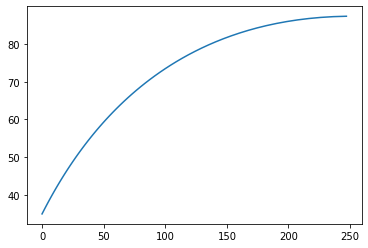

In [62]:
X_points= np.array([[0,xw]])
Y_points= np.array([[TR,yw]])
RTHROAT=TR
REXIT=yw[yw.size-1]

AR=(RTHROAT/REXIT)**2
xw= np.insert(xw,0,0)
yw=np.insert(yw,0,TR)

plt.plot(xw,yw)


In [63]:
# Saving to a CSV for Solidworks
zw=np.zeros(64)
pointsdf=pd.DataFrame(data=[xw,yw,zw])
df=(pointsdf.T)
print(df)

np.savetxt(solidworksinputfile, df.values, fmt='%10.5f', delimiter='\t')

# END


             0          1    2
0     0.000000  35.000000  0.0
1     2.095043  36.324445  0.0
2     3.378501  37.122943  0.0
3     4.692310  37.927140  0.0
4     6.037638  38.737131  0.0
..         ...        ...  ...
59  207.299162  86.363659  0.0
60  216.505946  86.733205  0.0
61  226.169955  87.024128  0.0
62  236.321769  87.227867  0.0
63  246.994599  87.334965  0.0

[64 rows x 3 columns]
